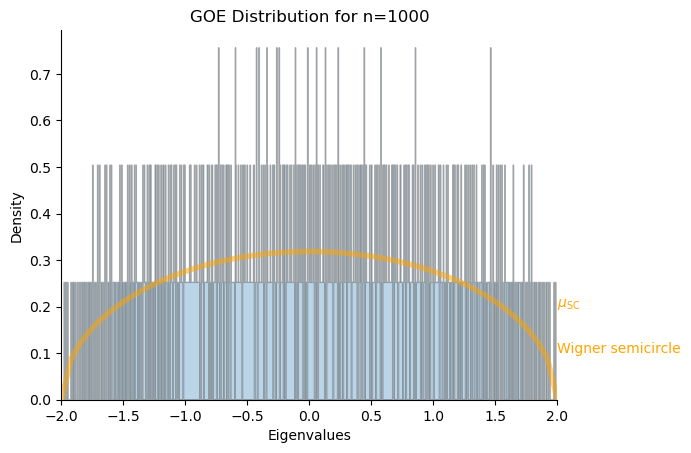

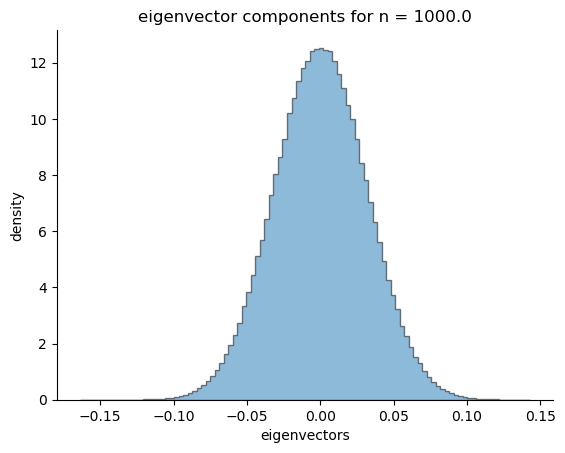

In [69]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt 

#Gaussian Ensamble
#parameters
n = 1000
mu, sigma = 0, 1 # mean and stdev
X = np.random.normal(mu,sigma,(n,n))
GOE = (X + X.T) / np.sqrt(2 * n)
eigs, eivecs = np.linalg.eigh(GOE)

plt.title("GOE Distribution for n=%s"% n)
plt.hist(eigs, density=True, histtype='stepfilled', alpha=0.3, bins=1000, ec="k")
plt.xlabel("Eigenvalues")
plt.ylabel("Density")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

xx = np.linspace(-2*sigma, 2*sigma)
yy = np.sqrt(4*np.square(sigma) - xx ** 2)/ (2 * np.square(sigma)*np.pi)
plt.plot(xx, yy, lw=4, alpha=0.5, color="orange")
plt.text(2, 0.2, r"$\mu_{\mathrm{SC}}$", color="orange")
plt.text(2, 0.1, "Wigner semicircle", color="orange")
plt.xlim(-2*sigma,2*sigma)
plt.show()

eivects = np.reshape(eivecs,(eivecs.shape[0]*eivecs.shape[1],1),order='C')
eivects = eivects[np.abs(eivects) > 1e-5]
plt.title("eigenvector components for n = %0.1f" % n)
plt.hist(eivects, density=True, histtype='stepfilled', alpha=0.5, bins=int(n/10), ec="k")
plt.xlabel("eigenvectors")
plt.ylabel("density")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


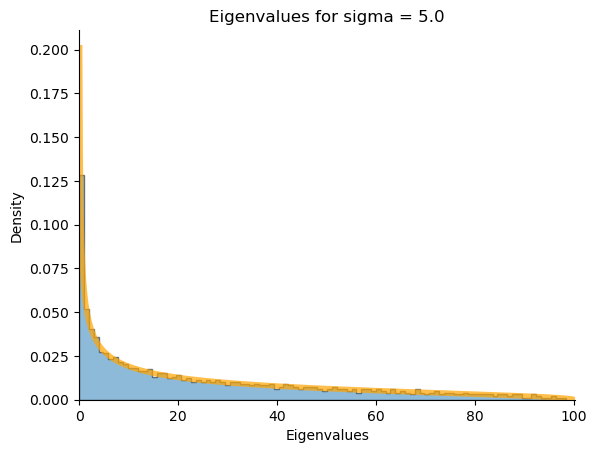

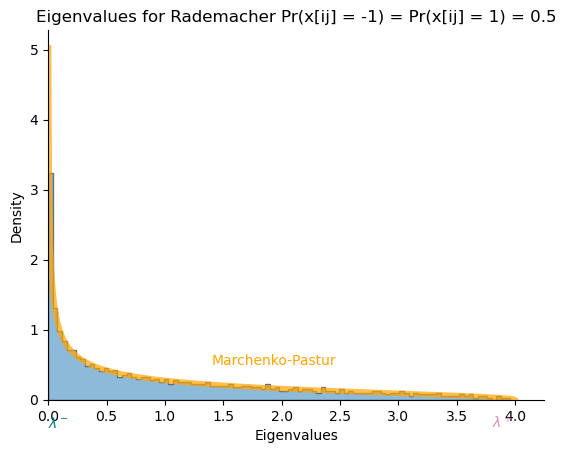

In [89]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

#Wishart Ensamble
#parameters
r = 1
n = 1000
mu, sigma = 0, 5 # mean and stdev
X = np.random.normal(mu,sigma,(int(n * r), n))
XRP = np.random.choice((np.array([-1.,1.])),(int(n * r),n),p=[0.5,0.5])
W = (X @ X.T) / n
WRP = (XRP @ XRP.T) / n

# print(eigs)
# # remove zero eigenvalues
def eigen(matrix):
    eigs, eivecs = np.linalg.eig(matrix)
    eigs = eigs[np.abs(eigs) > 1e-10]

    plt.title("Eigenvalues for sigma = %0.1f" % sigma)
    plt.hist(eigs, density=True, histtype='stepfilled', alpha=0.5, bins=100, ec="k")
    plt.xlabel("Eigenvalues")
    plt.ylabel("Density")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    lmax = (1 + np.sqrt(r)) ** 2 * np.square(sigma)
    lmin = (1 - np.sqrt(r)) ** 2
    xx = np.linspace(lmin, lmax, 1000)
    xx = xx[np.abs(xx) > 1e-10]
    if r <= 1:  
        yy = np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * np.square(sigma) * r * xx)
                                                         
    plt.plot(xx, yy, lw=4, alpha=0.7, color="orange")
    #plt.text(1.4*np.square(sigma), 0.5 * np.square(sigma), "Marchenko-Pastur", color="orange")
    #plt.text(0.95*lmin, -0.1 * lmax, r"$\lambda^-$", color="teal")
    #plt.text(0.95*lmax, -0.1 * lmax, r"$\lambda^+$", color="#E78AC3")
    plt.xlim(0,lmax+0.25)
    plt.show() 

def eigenrp(matrix):
    eigs, eivecs = np.linalg.eig(matrix)
    eigs = eigs[np.abs(eigs) > 1e-10]

    plt.title("Eigenvalues for Rademacher Pr(x[ij] = -1) = Pr(x[ij] = 1) = 0.5")
    plt.hist(eigs, density=True, histtype='stepfilled', alpha=0.5, bins=100, ec="k")
    plt.xlabel("Eigenvalues")
    plt.ylabel("Density")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    lmax = (1 + np.sqrt(r)) ** 2
    lmin = (1 - np.sqrt(r)) ** 2
    xx = np.linspace(lmin, lmax, 1000)
    xx = xx[np.abs(xx) > 1e-10]
    if r <= 1:  
        yy = np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * r * xx)
                                                         
    plt.plot(xx, yy, lw=4, alpha=0.7, color="orange")
    plt.text(1.4, 0.5, "Marchenko-Pastur", color="orange")
    plt.text(0.95 * lmin, -0.1 * lmax, r"$\lambda^-$", color="teal")
    plt.text(0.95 * lmax, -0.1 * lmax, r"$\lambda^+$", color="#E78AC3")
    plt.xlim(0,lmax+0.25)
    plt.show()

eigen(W)
eigenrp(WRP)



### 

<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/var/folders/hh/nh2dbgg13m91wbj__m66m8gr0000gn/T/ipykernel_38331/742437186.py:22: SyntaxWarning: invalid escape sequence '\s'
  plt.hist(np.ravel(all_eigs_gaussian), density=True, histtype='step', alpha=0.6, bins=50, ec="k", lw=2, label="$X_{ij} \sim $ Gaussian")
/var/folders/hh/nh2dbgg13m91wbj__m66m8gr0000gn/T/ipykernel_38331/742437186.py:23: SyntaxWarning: invalid escape sequence '\s'
  plt.hist(np.ravel(all_eigs_binomial), density=True, histtype='step', alpha=0.6, bins=50, ec="orange", lw=2, label="$X_{ij} \sim $ Gaussian")
/var/folders/hh/nh2dbgg13m91wbj__m66m8gr0000gn/T/ipykernel_38331/742437186.py:24: SyntaxWarning: invalid escape sequence '\s'
  plt.hist(np.ravel(all_eigs_gumbel

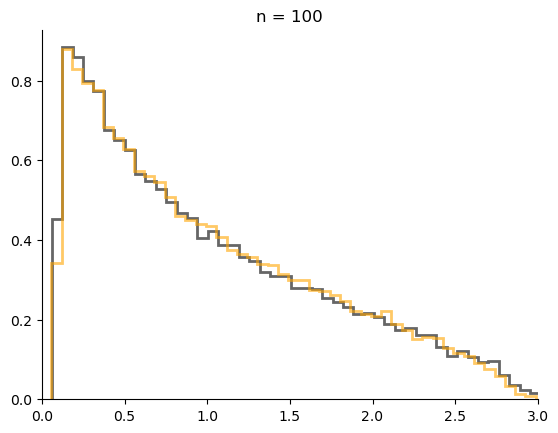

In [21]:
#Universality
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt 

r = 0.5
n = 100
all_eigs_gaussian = []
all_eigs_binomial = []
all_eigs_gumbel = []
for run in range(int(50000 / n)):
    X = np.random.randn(int(n * r), n)
    W = (X @ X.T) / n
    eigs = linalg.eigvalsh(W)
    all_eigs_gaussian.append(eigs)

    X_binomial = 2 * np.random.binomial(1, 0.5, size=(int(n * r), n)) - 1
    W_binomial = (X_binomial @ X_binomial.T) / n
    eigs_binomial = linalg.eigvalsh(W_binomial)
    all_eigs_binomial.append(eigs_binomial)

plt.title("n = %s" % n)
plt.hist(np.ravel(all_eigs_gaussian), density=True, histtype='step', alpha=0.6, bins=50, ec="k", lw=2, label="$X_{ij} \sim $ Gaussian")
plt.hist(np.ravel(all_eigs_binomial), density=True, histtype='step', alpha=0.6, bins=50, ec="orange", lw=2, label="$X_{ij} \sim $ Gaussian")
plt.hist(np.ravel(all_eigs_gumbel), density=True, histtype='step', alpha=0.6, bins=30, ec="black", lw=2, label="$X_{ij} \sim $ Gaussian")
plt.xlim(0, 3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()